<a href="https://colab.research.google.com/github/vilagosv/it-cert-automation-practice/blob/master/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
cols = ["Outlook", "Humidity", "Wind"]
data = [
    ["Sunny", ">75", 0],
    ["Sunny", ">75", 1],
    ["Overcast", ">75", 0],
    ["Rainy", ">75", 0],
    ["Rainy", ">75", 0],
    ["Rainy", "<=75", 1],
    ["Overcast", "<=75", 1],
    ["Sunny", ">75", 0],
    ["Sunny", "<=75", 0],
    ["Rainy", ">75", 0],
    ["Sunny", "<=75", 1],
    ["Overcast", ">75", 1],
    ["Overcast", "<=75", 0],
    ["Rainy", ">75", 1],
    ["Overcast", ">75", 1], #test
    ["Rainy", "<=75", 0],
    ["Rainy", ">75", 1],
    ["Sunny", ">75", 0]
]
labels = ["Don't play", "Don't play", "Play", "Play", "Play", "Don't play", "Play", "Don't play",
          "Play", "Play", "Play", "Play", "Play", "Don't play"]

df = pd.DataFrame(data, columns=cols)
df

,Outlook,Humidity,Wind
0,Sunny,>75,0
1,Sunny,>75,1
2,Overcast,>75,0
3,Rainy,>75,0
4,Rainy,>75,0
5,Rainy,<=75,1
6,Overcast,<=75,1
7,Sunny,>75,0
8,Sunny,<=75,0
9,Rainy,>75,0


In [99]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
labels_cat = enc.fit_transform(np.array(labels).reshape(-1,1))
df[cols] = enc.fit_transform(df[cols])


In [100]:
X_train = df[:-4]
Y_train = labels_cat

X_test = df[-4:]

In [101]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_en.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

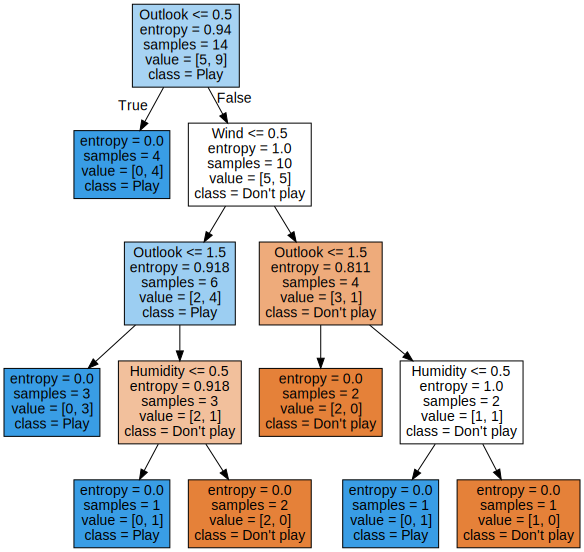

In [102]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                                feature_names=cols,  
                                class_names=["Don't play", "Play"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [103]:
clf_en.predict(X_test)

array([1., 1., 0., 0.])